In [254]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
import pandas as pd
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": "Times New Roman",
    "font.size": 10,
    "axes.linewidth": 0.8,  # Thinner axis lines
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "axes.labelsize": 10,
    "axes.titlesize": 10,
})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize=10)     # Axis labels
plt.rc('xtick', labelsize=8)     # X tick labels
plt.rc('ytick', labelsize=8)     # Y tick labels
plt.rc('legend', fontsize=8)     # Legend font size


In [304]:
figsize =(7, 5)

def population_time_plot(data_path, fig_path=None):
    df = pd.read_csv(data_path)

    # Set up matplotlib to use LaTeX and adjust fonts for publication quality

    # Optionally, set a seaborn context for "paper" (you can adjust the font_scale as needed)

    # Create a figure with dimensions appropriate for a single-column IEEE paper (in inches)
    fig, ax = plt.subplots(figsize=figsize)

    # Create the scatter plot using seaborn and the given data
    sns.scatterplot(
        data=df,
        x='T',
        y='time',
        hue='population_type',
        s=30,      # Marker size can be adjusted as needed
        ax=ax
    )

    # Use a logarithmic scale for the y-axis
    ax.set_yscale('log')

    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    ax.set_xlabel(r'Time Horizon $T$')
    ax.set_ylabel('Computation Time (s)')

    # Customize legend: position and remove the frame for a cleaner look
    legend = ax.legend(bbox_to_anchor=(0, 1), loc='upper left', frameon=False)

    # Ensure a tight layout to maximize the use of space
    plt.tight_layout()
    if fig_path is not None:
        plt.savefig(fig_path, format='pdf', dpi=300, bbox_inches='tight')
    plt.show()





# Optionally, set a seaborn context for "paper" (you can adjust the font_scale as needed)
def benchmark_plot(data_path, fig_path=None):
    # Create a figure with dimensions appropriate for a single-column IEEE paper (in inches)
    df = pd.read_csv(data_path)
    fig, ax = plt.subplots(figsize=figsize)

    # Create the scatter plot using seaborn and the given data
    sns.scatterplot(
        data=df,
        x='N',
        y='time',
        hue='benchmark',
        s=30,      # Marker size can be adjusted as needed
        ax=ax
    )

    # Use a logarithmic scale for the y-axis
    ax.set_yscale('log')

    # Configure grid lines for clarity in a publication-quality figure
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    # Set axis labels with LaTeX formatting for the x-axis
    ax.set_xlabel(r'Population Size $N$')
    ax.set_ylabel('Computation Time (s)')

    # Customize legend: position and remove the frame for a cleaner look
    legend = ax.legend(bbox_to_anchor=(0, 1), loc='upper left', frameon=False)

    # Ensure a tight layout to maximize the use of space
    plt.tight_layout()

    # Save the figure in vector format (PDF) for IEEE publication quality
    # plt.savefig('IEEE_benchmark_plot.pdf', format='pdf', dpi=300)
    if fig_path is not None:
        plt.savefig(fig_path, format='pdf')
    plt.show()
    
def box_plot(data_path, fig_path=None):
    l_inf_df = get_df('l_inf', data_path)
    lp_df = get_df('lp', data_path)

    lp_color = 'cornflowerblue'
    l_inf_color = 'salmon'
    # Define your metrics and corresponding DataFrame columns for two groups.
    columns = ['g-polymatroid_norm','general_affine_norm', 'zonotope_norm']
    labels = ['G-Polymatroid', 'General Affine', 'Zonotope']


    # Extract the data for each group.
    data_group1 = lp_df[columns].values  # shape: (n_samples, 3)
    data_group2 = l_inf_df[columns].values  # shape: (n_samples, 3)

    # Define positions for grouped boxplots.
    n_metrics = len(columns)
    # Each metric gets a group of two boxes; leave a gap between groups.
    positions_group1 = np.arange(n_metrics) * 1.5
    positions_group2 = positions_group1 + 0.4  # adjust the offset as needed

    fig, ax = plt.subplots(figsize=figsize)

    # Plot boxplots for Group 1.
    bp1 = ax.boxplot(
        data_group1,
        positions=positions_group1,
        widths=0.3,
        patch_artist=True,
        showfliers=False,
        boxprops={'facecolor': lp_color},
        whiskerprops={'color': 'black'},
        medianprops={'color': 'black'}
    )

    # Plot boxplots for Group 2.
    bp2 = ax.boxplot(
        data_group2,
        positions=positions_group2,
        widths=0.3,
        patch_artist=True,
        showfliers=False,
        boxprops={'facecolor': l_inf_color},
        whiskerprops={'color': 'black'},
        medianprops={'color': 'black'}
    )

    # Set x-tick labels at the center of each metric group.
    tick_positions = positions_group1 + 0.2  # center between the two boxes.
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(['G-Polymatroid', 'Zonotope', 'General Affine'])

    # Add a legend manually.
    legend_elements = [
        Patch(facecolor=lp_color, label='Electricty Cost'),
        Patch(facecolor=l_inf_color, label='Peak Power')
    ]
    ax.legend(handles=legend_elements, loc='upper left')


    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.set_ylabel('Relative Cost')
    plt.tight_layout()
    if fig_path is not None:

        plt.savefig(fig_path, format='pdf', dpi=300, bbox_inches='tight')

    plt.show()

def get_df(metric, data_path):
    df = pd.read_csv(data_path)
    df.columns = ['benchmark', 'run_id', 'metric', 'value']
    n_compars = int(df.groupby('run_id').count().max().iloc[0])
    df = df[~df['run_id'].isin(
        df.groupby('run_id').filter(lambda x: x['benchmark'].count() != n_compars)['run_id'].unique()
    )]
    metric_df = df.groupby('metric').get_group(metric)
    metric_df = metric_df.pivot(index='run_id', columns='benchmark', values='value')
    metric_df['base_line_norm'] = metric_df['base_line'] / metric_df['base_line']
    metric_df['g-polymatroid_norm'] = metric_df['g-polymatroid'] / metric_df['base_line']
    metric_df['zonotope_norm'] = metric_df['zonotope'] / metric_df['base_line']
    metric_df['general_affine_norm'] = metric_df['general_affine'] / metric_df['base_line']

    return metric_df




In [289]:
population_path = '../numerical_results/data/population_time.csv'
benchmark_path = '../numerical_results/data/benchmarking_time.csv'
case_study_path = '../numerical_results/data/case_study4_50.csv'

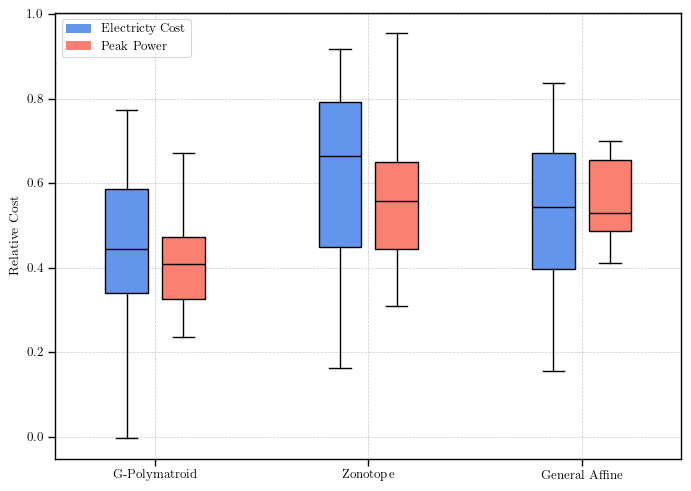

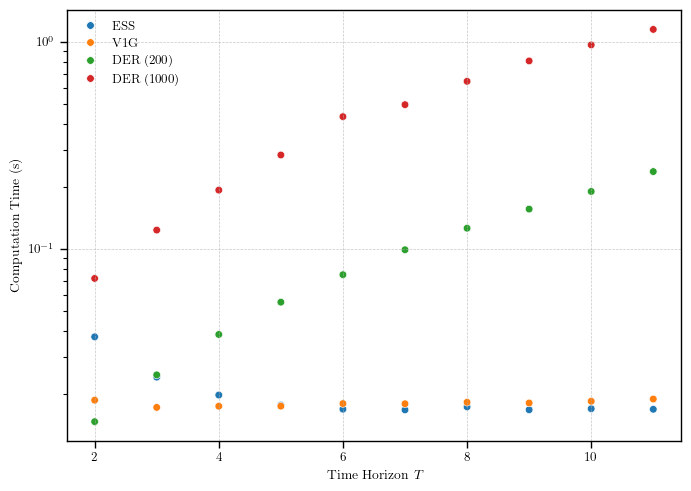

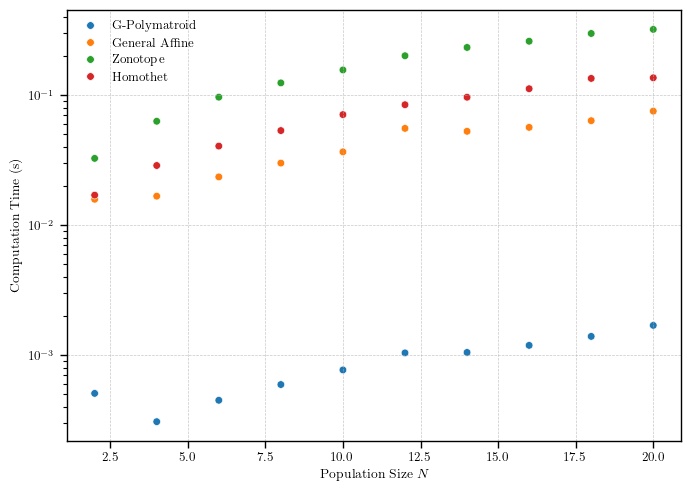

In [305]:
cost_fig_path = './figures/cost_plot.pdf'
population_fig_path = './figures/population_time_plot.pdf'
benchmark_fig_path = './figures/benchmark_plot.pdf'

box_plot(case_study_path, cost_fig_path)
population_time_plot(population_path, population_fig_path)
benchmark_plot(benchmark_path, benchmark_fig_path)